In [165]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file into a DataFrame
data = pd.read_csv('../data/student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [166]:
# Drop rows with missing values
data = data.dropna()

# Drop the "Student_ID" column
data = data.drop(columns=['Student_ID'])

# Encode categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate features and target
X = data.drop(['Sleep_Quality'], axis=1)
y = data['Sleep_Quality']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [167]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.06
              precision    recall  f1-score   support

           1       0.08      0.06      0.07        18
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        12
           4       0.08      0.12      0.10         8
           5       0.00      0.00      0.00         8
           6       0.15      0.22      0.18         9
           7       0.00      0.00      0.00         9
           8       0.12      0.12      0.12         8
           9       0.00      0.00      0.00         7
          10       0.17      0.08      0.11        12

    accuracy                           0.06       100
   macro avg       0.06      0.06      0.06       100
weighted avg       0.07      0.06      0.06       100



### The Decision Tree Visualized:

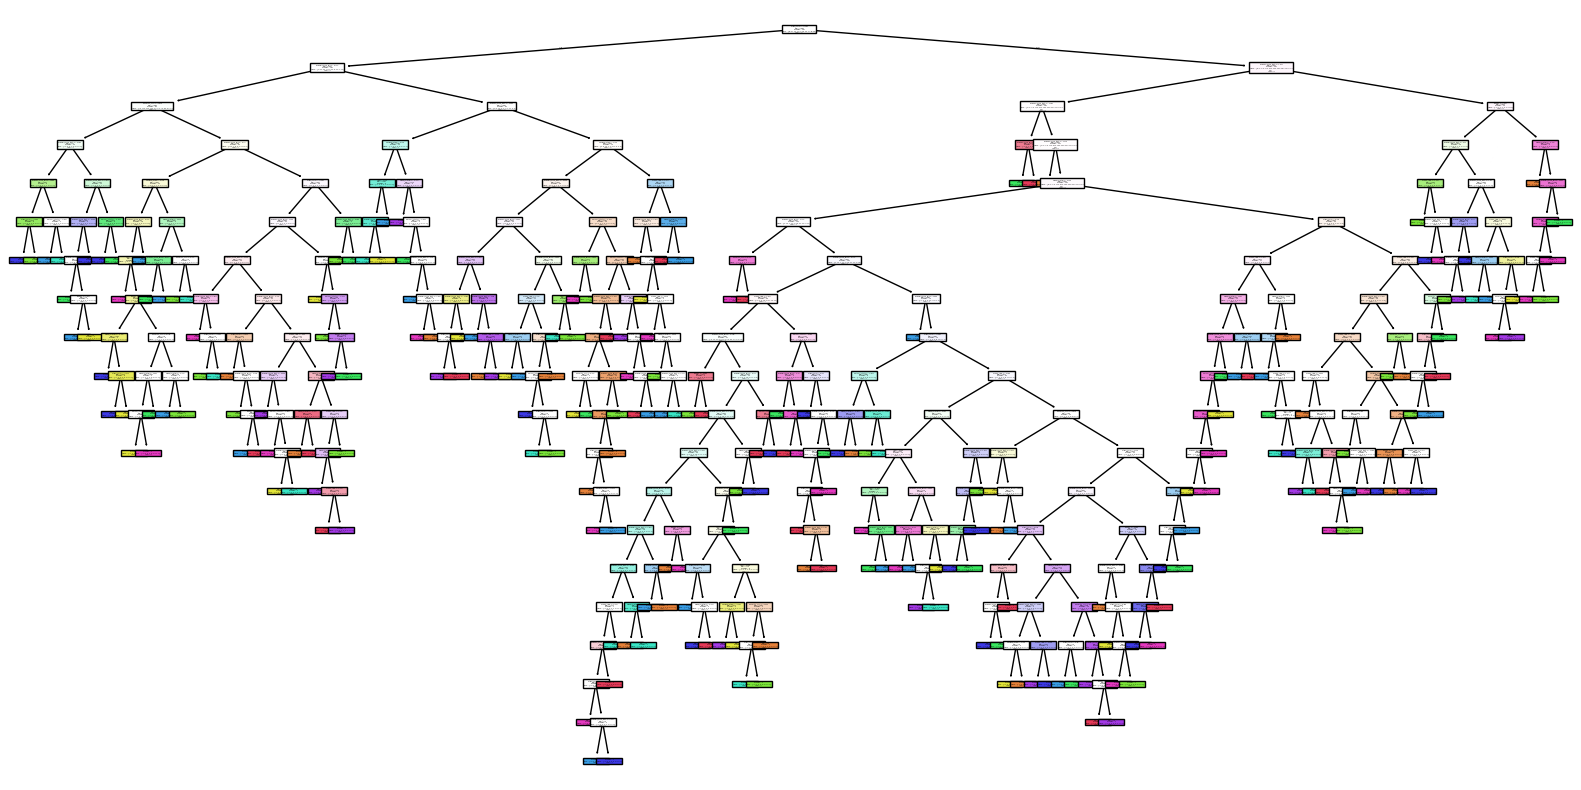

In [168]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()])
plt.show()

In [169]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- Study_Hours <= -0.27
|   |--- Weekend_Sleep_End <= -0.08
|   |   |--- University_Year <= -0.88
|   |   |   |--- Weekend_Sleep_Start <= -0.90
|   |   |   |   |--- Weekday_Sleep_End <= 0.69
|   |   |   |   |   |--- Study_Hours <= -1.36
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- Study_Hours >  -1.36
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Weekday_Sleep_End >  0.69
|   |   |   |   |   |--- Physical_Activity <= -0.10
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- Physical_Activity >  -0.10
|   |   |   |   |   |   |--- class: 5
|   |   |   |--- Weekend_Sleep_Start >  -0.90
|   |   |   |   |--- Weekday_Sleep_Start <= 0.00
|   |   |   |   |   |--- Weekday_Sleep_Start <= -0.41
|   |   |   |   |   |   |--- Weekend_Sleep_End <= -0.86
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- Weekend_Sleep_End >  -0.86
|   |   |   |   |   |   |   |--- Gender <= 0.05
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |  

In [170]:
# Get feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                     importance
Weekday_Sleep_Start    0.117460
Sleep_Duration         0.114050
Study_Hours            0.112802
Weekend_Sleep_End      0.112260
Screen_Time            0.104452
Weekend_Sleep_Start    0.101903
Weekday_Sleep_End      0.086647
Physical_Activity      0.062741
University_Year        0.060050
Gender                 0.048239
Caffeine_Intake        0.040567
Age                    0.038829


In [171]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.09 0.08 0.08 0.08 0.08]
Mean cross-validation score: 0.082


### Pruning the Tree to reduce complexity:

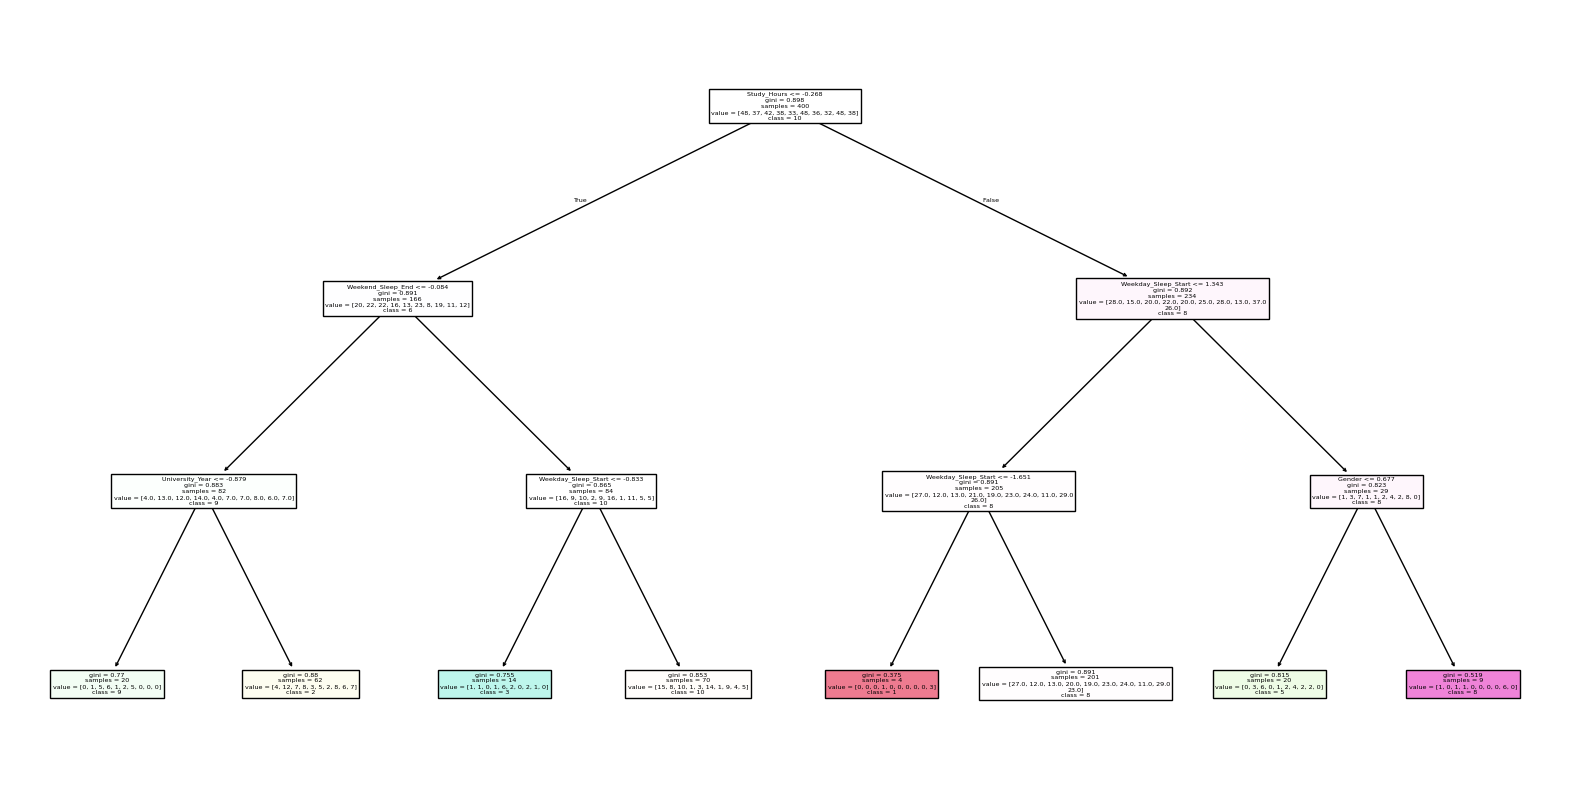

In [172]:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()])
plt.show()

In [173]:
pruned_tree_rules = export_text(clf_pruned, feature_names=list(X.columns))
print(pruned_tree_rules)

|--- Study_Hours <= -0.27
|   |--- Weekend_Sleep_End <= -0.08
|   |   |--- University_Year <= -0.88
|   |   |   |--- class: 4
|   |   |--- University_Year >  -0.88
|   |   |   |--- class: 2
|   |--- Weekend_Sleep_End >  -0.08
|   |   |--- Weekday_Sleep_Start <= -0.83
|   |   |   |--- class: 5
|   |   |--- Weekday_Sleep_Start >  -0.83
|   |   |   |--- class: 1
|--- Study_Hours >  -0.27
|   |--- Weekday_Sleep_Start <= 1.34
|   |   |--- Weekday_Sleep_Start <= -1.65
|   |   |   |--- class: 10
|   |   |--- Weekday_Sleep_Start >  -1.65
|   |   |   |--- class: 9
|   |--- Weekday_Sleep_Start >  1.34
|   |   |--- Gender <= 0.68
|   |   |   |--- class: 3
|   |   |--- Gender >  0.68
|   |   |   |--- class: 9



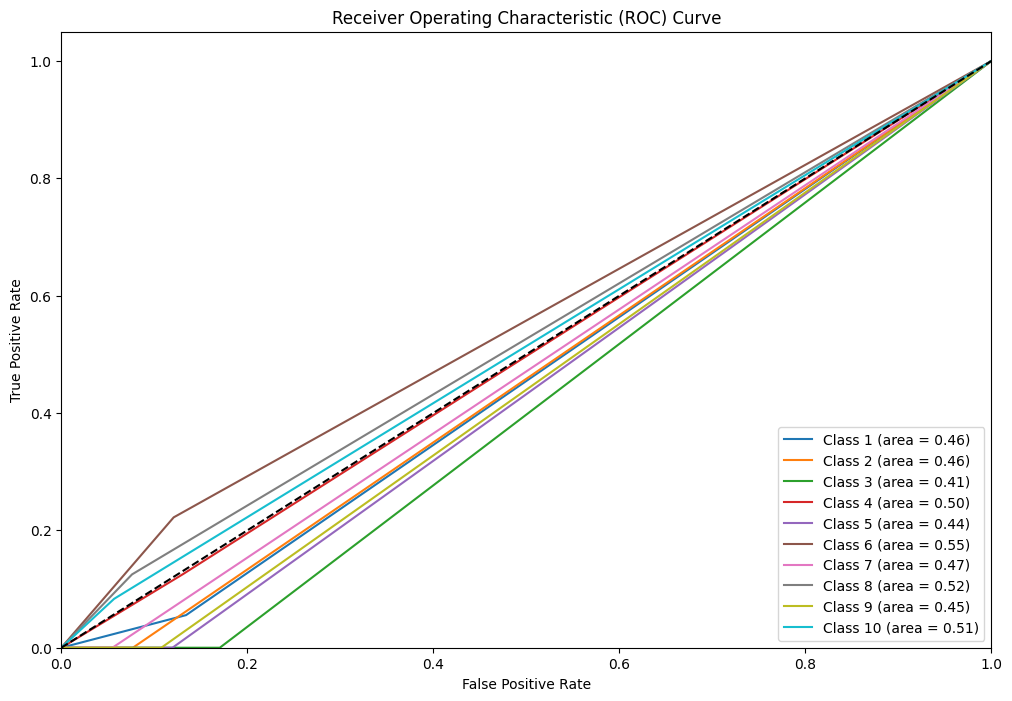

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_pred_binarized = label_binarize(y_pred, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot ROC curve
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

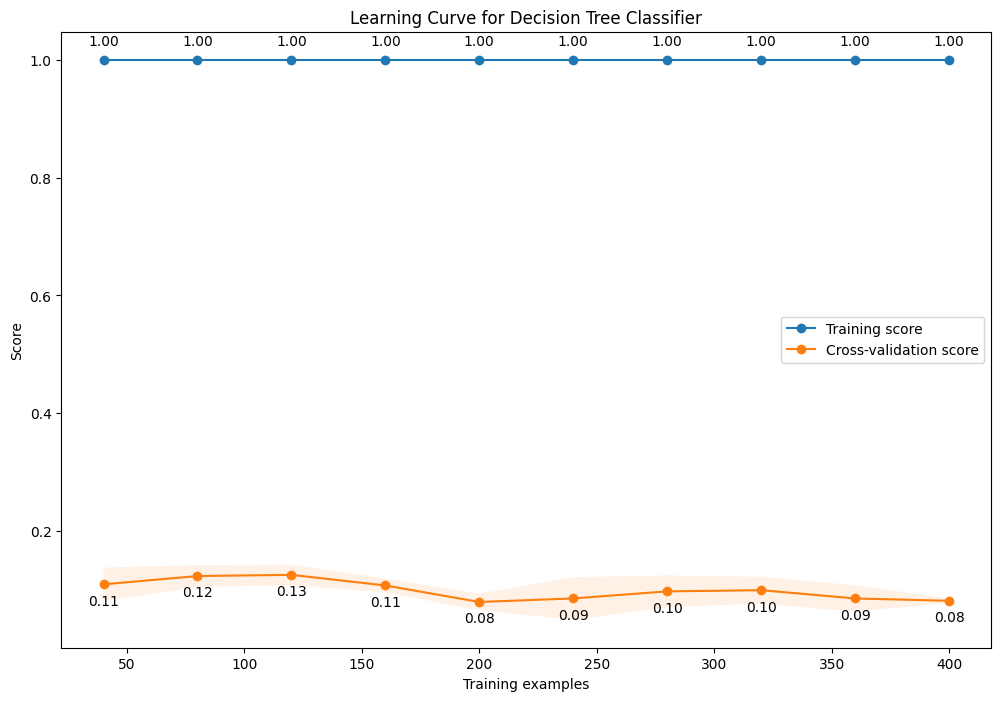

In [175]:
import numpy as np
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

# Annotate the points with their values
for i in range(len(train_sizes)):
    plt.annotate(f'{train_scores_mean[i]:.2f}', (train_sizes[i], train_scores_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{test_scores_mean[i]:.2f}', (train_sizes[i], test_scores_mean[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Decision Tree Classifier')
plt.legend(loc='best')
plt.show()